# Sales Prediction with Linear Regression

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' % x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

## Simple Linear Regression with OLS Using Scikit-Learn

OLS = EKK (En Küçük Kareler Yöntemi)

In [3]:
df = pd.read_csv('datasets/advertising.csv')

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90


In [5]:
df.shape

(200, 4)

Buradaki veri setinde, televizyon, radyo ve gazeteye harcanan reklam giderlerinin ne kadar satış getirdiği bilgisi veriliyor. Şu an basit lineer regresyon modeli konusunda olduğumuzdan dolayı buradan sadece 2 tane değişken seçeceğiz.

In [6]:
X = df["TV"].values.reshape(-1,1)
y = df["sales"].values

X değerimiz bağımsız değişken, yani TV değişkeni, y değişkenimiz ise bağımlı değişken yani sales değişkeni. Öncelikle yapacağımız işlem, bu iki değişken arasındaki doğrusal ilişkiyi modellemek, ve ardından da bu model denklemini bir grafik yardımıyla değerlendireceğiz. 

### Model

In [7]:
lin_reg = LinearRegression().fit(X, y)

Tek değişkenli lineer regresyon modelimizi kurduk. Lineer regresyonumuz tek değişkenli olduğu zamanki formülümüz:

y_pred = b + w*x

Bu modelde önemli olan kısımlar b yani intercept ve w yani weight değerleridir. Yukarıda kurduğumuz modelin b ve w değerlerine ulaşabiliriz.

In [8]:
# sabit (b, bias, intercept)
lin_reg.intercept_

7.032593549127693

In [9]:
# katsayı (w, coefficient)
lin_reg.coef_[0]

0.047536640433019764

Bizim bir model kurmamız, aslında denklem içerisindeki b ve w değerlerini bulduğumuz anlamına gelir. Yani yukarıdaki modeli asıl kurma amacımız, lineer regresyon denklemindeki b ve w değerlerini bulmaktı. Bu iki değer ise yukarıdaki gibi hesaplandı.

### Tahmin

Yukarıdaki bulduğumuz sonuçlara göre denklem üzerinde bir işlem yapacağımızı düşünelim. Örnek olarak; "150 birimlik TV harcaması olursa ne kadar satış olur?" şeklinde bir sorumuz olduğunu düşünelim. Cevabı bulabilmek için yukarıdaki denklemi kullanırsak:

y_pred = b + w*x  (<i>ana denklemimiz</i>)

y_pred = 7.03259 + 0.04754 * 150

y_pred = 14.16359

In [10]:
lin_reg.intercept_ + (lin_reg.coef_[0] * 150)

14.163089614080658

Aynı soruyu 500 birimlik TV harcaması olursa ne olur şeklinde sorarsak:

In [11]:
lin_reg.intercept_ + (lin_reg.coef_[0] * 500)

30.800913765637574

Kurduğumuz modeli görselleştirmek istersek:

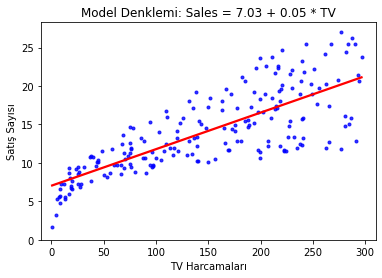

In [12]:
# modeli görselleştirmek
g = sns.regplot(x=X, y=y, scatter_kws={'color':'b', 's':9},
               ci=False, color='r')
g.set_title(f"Model Denklemi: Sales = {round(lin_reg.intercept_, 2)} + {round(lin_reg.coef_[0], 2)} * TV")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310) # x eksenini -10'dan 310'a kadar sırala
plt.ylim(bottom=0) # y ekseninde 0'dan başla
plt.show()

Oluşturduğumuz modele bir TV değeri verdiğimizde sales değerini tahmin etmenin ana mantığını yukarıda anladık. Şimdi modelden, X verileri üzerinden tahmin verilerini hesaplayıp bize tahmin değerlerini döndürmesini isteyeceğiz.

In [13]:
y_pred = lin_reg.predict(X)

In [14]:
y_pred # tahmin edilen değerler

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

### Tahmin Başarısı

Defterin başında iki tane ölçüm metodu import etmiştik. Bunlar; mean squared error ve mean absolute error

MSE metodunu kullanırken parametre olarak gerçek y değerleri ve tahmin edilen y değerleri girilmelidir.

In [15]:
# MSE
mean_squared_error(y, y_pred)

10.512652915656757

Yukarıdaki değer, bizim ortalama hata değerimiz. Bunun büyük ya da küçük bir değer olduğunun yorumunu yapamıyoruz. Böyle bir durumda karşılaştırma yapabilmek için, bağımlı değişkenin ortalamasına ve standart sapmasına bakılarak bir karşılaştırma yapılabilir.

In [16]:
y.mean()

14.0225

In [17]:
y.std()

5.204396578855228

Veri setimizde ortalama 14 birimlik satış var ve bu yaklaşık olarak 5 standart sapmaya sahip. Yani veriler 19 ile 9 arasında değişiyor gibi gözüküyor. Bu durumda elde ettiğimiz 10 birimlik hata değeri büyük mü diye düşünecek olursak, bu veriler karşısında bir miktar büyük gibi gözüküyor. Bu değer 1.5-2.5 arasında bir değer alsa daha mantıklı olur (ne kadar küçük o kadar iyi). Şu anki değerler ile, "*satışlarımızın değeri ortalama 14 birim, biz bir tahmin yaptığımızda ortalama 10 birimlik hata yapıyorsak bu o kadar da küçük bir hata olmamış olur*", yorumunu yapabiliriz.

In [18]:
# RMSE
np.sqrt(mean_squared_error(y, y_pred))

3.2423221486546887

In [19]:
# MAE
mean_absolute_error(y, y_pred)

2.549806038927486

Yukarıdaki hata ortalamarına baktığımız zaman hepsinin birbirinden farklı değerler hesapladığını görüyoruz. Burada en düşük değer MAE'nin hesapldığı değer. Fakat biz bu değere bakarak, MAE'nin daha iyi olduğu yorumunu yapamayız. Burada daha iyinin kıyas noktası bu metriklerin birbirleri ile kıyasları değil, modelde değişiklik yaptıktan sonra örneğin iki MAE'nin kıyası, iki MSE'nin kıyasıdır. **Yani hata metrikleri birbirleri ile kıyaslanmaz! Sadece ilk hesaplanan metrik değeri ile, modelde değişiklik yaptıktan sonraki hesaplanan metrik değeri birbirleri ile kıyaslanabilir. Bu iki metrik değerinin aynı metrik yöntemiyle hesaplanmış olması gerekir.**

**R Kare yöntemi**, modelin başarısını hesaplayan yöntemdir. Bu yöntem, modeli oluşturan bağımsız değişkenlerin, bağımlı değişkenleri ne kadar doğru tahmin ettiğinin bir ölçüsüdür.

In [20]:
lin_reg.score(X, y)

0.611875050850071

Yukarıdaki kod ile r kare değerini hesaplamış oluruz. Burada çıkan değer bize, X değerleri y değerlerinin %61'ini doğru tahmin ettiğini ifade eder.

**Dikkat!** Birincisi, değişken sayısı arttıkça r kare şişmeye meyillidir, burada düzeltilmiş r kare değerinin de göz önünde bulundurulması gerekir. İkincisi, biz buradaki katsayılarla, istatistiki değerler ile ilgilenmiyoruz!

## Multiple Linear Regression

Bu modelde, sadece bir tane bağımsız değişken değil, birden fazla bağımsız değişken bulunmaktadır.

In [21]:
df = pd.read_csv('datasets/advertising.csv')

In [22]:
df.head()

,TV,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90


Burada yapacağımız işlem, diğer değişkenleri de kullanarak çoklu doğrusal regresyon modeli kurmak. 

In [23]:
X = df.drop("sales", axis=1)
y = df["sales"]

### Model

Bu kısımda elimizdeki verileri train ve test olacak şekilde böleceğiz.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [25]:
lin_reg = LinearRegression()

In [26]:
lin_reg.fit(X_train, y_train)

LinearRegression()

Kurduğumuz modelin intercept ve coefficient değerlerine bakabiliriz:

In [27]:
# sabit (b, bias, intercept)
lin_reg.intercept_

2.9079470208164295

In [28]:
# coefficient (w, weights)
lin_reg.coef_

array([0.0468431 , 0.17854434, 0.00258619])

### Tahmin

Aşağıdaki gözlem değerlerine göre satışın beklenen değeri nedir?

TV=30, radio=10, newspaper=40 

In [29]:
yeni_veri = [30, 10, 40]

In [30]:
lin_reg.intercept_ + (lin_reg.coef_[0] * yeni_veri[0]) + (lin_reg.coef_[1] * yeni_veri[1]) + (lin_reg.coef_[2] * yeni_veri[2])

6.202130997974464

Şimdi bu işlemi modelden yapmasını isteyelim. Ama öncelikle yeni veri listesini dataframe'e çevirmemiz gerekiyor.

In [31]:
yeni_veri = pd.DataFrame(yeni_veri).T # .T ile listedeki değerleri satırda değil sütunda sıralamasını istiyoruz!

In [32]:
yeni_veri

,0,1,2
0,30,10,40


In [33]:
lin_reg.predict(yeni_veri)

array([6.202131])

### Tahmin Başarısını Değerlendirme

In [34]:
# train RMSE
y_pred = lin_reg.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))

1.7369025901470923

In [35]:
# train r kare
lin_reg.score(X_train, y_train)

0.8959372632325174

Yukarıdaki hesaplamalarda x_train değerlerinden tahminler oluşturduk ve daha sonrasında bunları gerçek y değerleri olan y_train ile karşılaştırdık (RMSE'sini aldık). 1.737 değerini elde ettik. 

Aynı şekilde train değerleri ile r kare değerini hesapladığımızda da %89'luk bir accuracy yakaladık.

Şimdi aynı şeyi test verileri ile yapalım.

In [36]:
# test RMSE
y_pred = lin_reg.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.4113417558581578

In [37]:
# test r kare
lin_reg.score(X_test, y_test)

0.8927605914615385

Test verilerinden tahminler oluşturup gerçek y değerleri ile (yani y_test) RMSE hesapladığımızda train RMSE değerinden daha düşük bir değer elde ettik. Normalde yüksek değer beklenirdi fakat düşük gelmesi bizim için iyi bir durum.

Diğer yandan test verileri ile r kare hesapladığımızda train veri setindeki r kare ile aynı değeri yakaladık (%89). Yani kurduğumuz model hem train veri setinde, hem de test veri setinde iyi tahminler üretmektedir.

Şimdi 5 katlı cross validation yöntemini kullanarak bir RMSE hesaplayalım ve veri setimiz için hangisinin daha iyi olduğunu yorumlayalım.

In [38]:
# 5 Katlı CV RMSE
np.mean(np.sqrt(-cross_val_score(lin_reg, X, y, cv=5, scoring="neg_mean_squared_error")))

1.7175247278732086

train RMSE -> 1.74

test RMSE -> 1.41

5 katlı cv RMSE -> 1.72

Buradaki hatalardan hangisine güvenmemiz lazım? Eğer veri setimiz bol olsaydı, yani gözlem birimi sayımız yüksek olsaydı, hangisi olacağı çok fark etmezdi. Ama veri setimizin boyutu az olduğundan dolayı 5 katlı çapraz doğrulama yöntemine daha fazla güvenmek daha doğru olabilir.

## Simple Linear Regression with Gradient Descent from Scratch

Bu bölümde sıfırdan, kendi kodlarımız ve kendi fonksiyonlarımız ile gradient descent yöntemini kullanarak uygulama yapacağız.

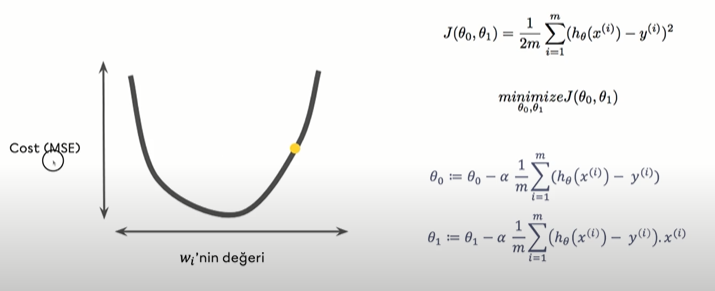

Burada ana amacımız, hata fonksiyonumuzu (cost fonksiyonu) minimuma indirmeye çalışmak. Bunu b ve w değerlerini değiştirerek gerçekleştiriyorduk. nasıl işlem? Parametrelere göre kısmı türev alındıktan sonra bu kısmi türevler neticesinde ortaya çıkan değerler, belirli bir öğrenme oranı (a) ile çarpıldıktan sonra buradan gelecek olan - ya da + ifadesine göre parametrenin eski değerine ekleniyor ya da parametrenin eski değerinden çıkarılıyordu. Böylece bu fonksiyonda minimum noktaya doğru gitmeye çalışıyorduk.

Şimdi bu işlemleri kod seviyesinde yapmaya çalışalım.

In [39]:
# cost function (mse)
def cost_function(Y, b, w, X):
    # Bu fonksiyonun görevi mse değerini hesaplamak. Bunun için bütün gözlem birimleri gezilir ve bir sabit ve
    # ağırlık çiftine göre tahmin edilen değerleri hesaplar.
    
    m = len(Y) # gözlem sayısı
    sse = 0 # sum of squared error (hata kareler toplamı)
    
    for i in range(0, m): # bütün gözlem birimlerini gez. 
        y_pred = b + w * X[i] # verilmiş olan sabit ve ağırlık değerlerine göre ilgili satırdaki X değerinden bir tahmin yap 
        y = Y[i] # ilgili satırdaki gerçek y değeri
        sse += (y_pred - y) ** 2 # tahmin y ile gerçek y arasındaki farkın karesi alınarak sse ile toplanır
    
    mse = sse / m # toplam hata gözlem birimi sayısına bölündüğünde ortalama hatayı bulmuş oluruz
    return mse

Cost fonksiyonu ile elimizde coefficient ve intercept değerleri ve ayrıca bağımsız değişken ile bir tahmin oluşturup, ardından hata hesaplanarak bir mse değeri hesaplanır. 

Bunun dışında bir de ağırlıkların update edilme işlemlerinin gerçekleştirilmesi lazım. Bunun için de ayrı bir fonksiyon hazırlarız.

In [40]:
# update_weights
def update_weights(Y, b, w, X, learning_rate):
    m = len(Y)
    
    b_deriv_sum = 0 # intercept değerinin türevi
    w_deriv_sum = 0 # weight değerinin türevi
    
    for i in range(0, m):
        y_pred = b + w * X[i]
        y = Y[i]
        b_deriv_sum += (y_pred - y) # intercept değerinin türevi (teta0)
        w_deriv_sum += (y_pred - y) * X[i] # coefficient değerinin türevi (teta1)
        
    new_b = b - (learning_rate * 1 / m * b_deriv_sum)
    new_w = w - (learning_rate * 1 / m * w_deriv_sum)
    return new_b, new_w

Buradaki gradient descent fonksiyonumuz sadece bir kere çalışacaktır, yani bize sadece bir kere, 1 iterasyonda ağırlık ve sabit değeri döndürecektir. 

Şimdi yukarıdaki fonksiyonları belirli bir iterasyon içerisinde çalıştırabilmek için ayrı bir fonksiyon hazırlamamız gerekir.

In [41]:
# train fonksiyonu
def train(Y, initial_b, initial_w, X, learning_rate, num_iters):
    
    print("Starting gradient descent at b = {0}, w = {1}, mse = {2}".format(initial_b, initial_w,
                                                                           cost_function(Y, initial_b, initial_w, X)))
    
    b = initial_b
    w = initial_w
    
    cost_history = [] # her iterasyonda bir hata hesaplayacağız ve bu hataları bir yerde toplamak istiyoruz. bu liste ondan dolayı
    
    for i in range(num_iters):
        b, w = update_weights(Y, b, w, X, learning_rate) # belirlenen iterasyon kadar yeni b ve w değerleri hesapla
        mse = cost_function(Y, b, w, X) # hesaplanan yeni b ve w değerleri ile hata hesapla
        cost_history.append(mse) # hesaplanan hatayı cost_history içerisinde sakla
        
        if i % 100 == 0: # binlerce onbinlerce iterasyon yaptığımızda her 100de bir raporla
            print("iter={:d}    b={:.2f}    w={:.4f}    mse={:.4}".format(i, b, w, mse))
            
    # belirlenen iterasyon sonunda en son hesaplanan b, w ve mse değerleri ekrana yazdırılır
    print("After {0} iterations b = {1}, w = {2}, mse = {3}".format(num_iters, b, w, cost_function(Y, b, w, X)))
    return cost_history, b, w

Şimdi veri setimizi en baştan çağırıp, yukarıdaki yazdığımız fonksiyonları test edelim.

In [42]:
df = pd.read_csv("datasets/advertising.csv")

In [43]:
X = df["radio"]
Y = df["sales"]

Bağımlı ve bağımsız değerlerimizi belirledik. Yukarıdaki fonksiyonları kullanabilmek için girilmesi gerek parametreleri (ilk b, ilk w, learning_rate vs.) nereden bulup gireceğiz. 

Bunun için iki kavramı bilmemiz gerekli; parametre ve hiperparametre.

**Parametre**, modelin veriyi kullanarak veriden hareketle bulduğu değerlerdir. Örnek olarak ağırlıklar veri setinden bulunur. 

**Hiperparametreler** ise veri setinden bulunamayan ve kullanıcı tarafından ayarlanması gereken parametrelerdir. Örnek olarak ilk ağırlıklar, learning_rate, num_iters.

In [44]:
# hyperparameters
learning_rate = 0.001
initial_b = 0.001
initial_w = 0.001
num_iters = 10000

Hiperparametre değerlerimizi de belirlediğimize göre, train fonksiyonumuzu çalıştırabiliriz.

In [45]:
cost_history, b, w = train(Y, initial_b, initial_w, X, learning_rate, num_iters)

Starting gradient descent at b = 0.001, w = 0.001, mse = 222.9477491673001
iter=0    b=0.01    w=0.3708    mse=53.25
iter=100    b=0.28    w=0.4788    mse=41.6
iter=200    b=0.54    w=0.4709    mse=40.29
iter=300    b=0.79    w=0.4633    mse=39.04
iter=400    b=1.03    w=0.4559    mse=37.87
iter=500    b=1.27    w=0.4487    mse=36.76
iter=600    b=1.49    w=0.4417    mse=35.72
iter=700    b=1.72    w=0.4349    mse=34.73
iter=800    b=1.93    w=0.4283    mse=33.8
iter=900    b=2.14    w=0.4219    mse=32.92
iter=1000    b=2.35    w=0.4157    mse=32.09
iter=1100    b=2.54    w=0.4096    mse=31.3
iter=1200    b=2.74    w=0.4037    mse=30.56
iter=1300    b=2.92    w=0.3980    mse=29.87
iter=1400    b=3.10    w=0.3925    mse=29.21
iter=1500    b=3.28    w=0.3871    mse=28.58
iter=1600    b=3.45    w=0.3818    mse=28.0
iter=1700    b=3.62    w=0.3767    mse=27.44
iter=1800    b=3.78    w=0.3718    mse=26.92
iter=1900    b=3.94    w=0.3670    mse=26.42
iter=2000    b=4.09    w=0.3623    mse=25

10000 iterasyon sonunda, bize en düşük hatayı veren b ve w değerlerimiz sırası ile, 8.7906 ve 0.2184. 

Yukarıdaki yazdığımız fonksiyonlar gradient descent yöntemini 0'dan kendimiz yazmak içindi. Bu şekilde, basit doğrusal regresyon problemlerinden en ideal ağırlık değerlerini gradient descent yardımı ile hesaplayabiliriz.